# KLASIFIKASI MLP MNIST 

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Conv2D

import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


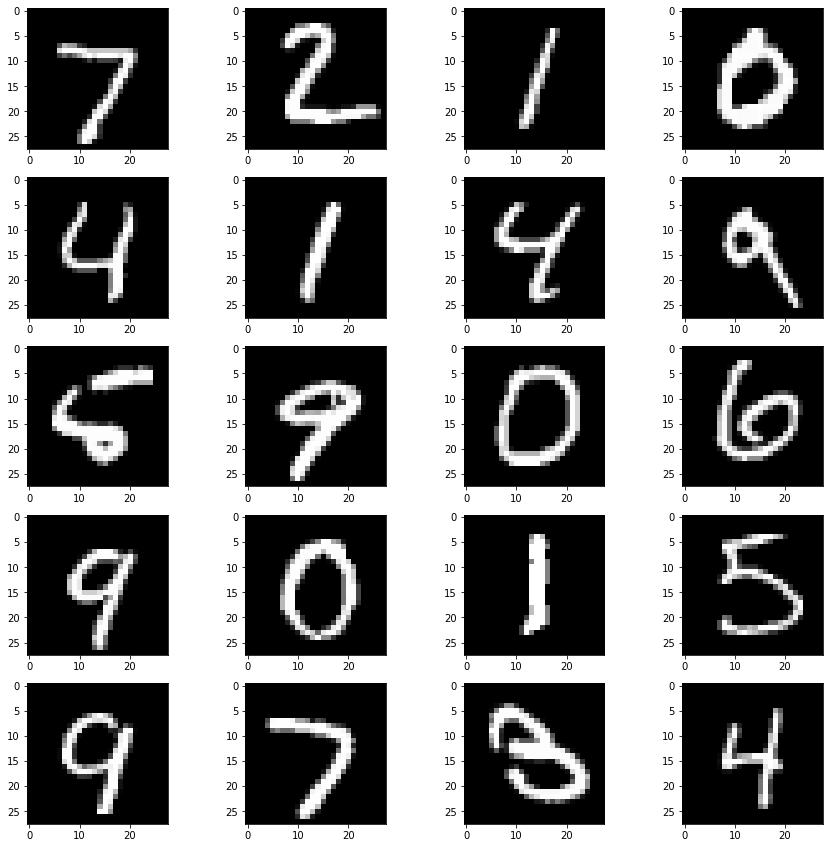

In [3]:
plt.figure(figsize=(15, 15))
for i in range(20):
    plt.subplot(5, 4, i + 1)
    plt.imshow(x_test[i], cmap=plt.get_cmap('gray'))

plt.show()

In [4]:
num_classes = 10
input_shape = (28, 28, 1)

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

print(x_train.shape)

(60000, 28, 28)


In [5]:
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "Sampel")
print(x_test.shape[0], "Sampel")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28)
60000 Sampel
10000 Sampel


### Model

In [6]:
model = keras.models.Sequential([
    layers.Flatten(input_shape=[28, 28]),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 16)                12560     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


### Training

In [7]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/15
375/375 [==============================] - 1s 2ms/step - loss: 0.8102 - accuracy: 0.7456 - val_loss: 0.3196 - val_accuracy: 0.9092
Epoch 2/15
375/375 [==============================] - 0s 1ms/step - loss: 0.2997 - accuracy: 0.9157 - val_loss: 0.2533 - val_accuracy: 0.9271
Epoch 3/15
375/375 [==============================] - 0s 1ms/step - loss: 0.2496 - accuracy: 0.9297 - val_loss: 0.2277 - val_accuracy: 0.9357
Epoch 4/15
375/375 [==============================] - 0s 1ms/step - loss: 0.2226 - accuracy: 0.9362 - val_loss: 0.2118 - val_accuracy: 0.9408
Epoch 5/15
375/375 [==============================] - 0s 1ms/step - loss: 0.2041 - accuracy: 0.9413 - val_loss: 0.2011 - val_accuracy: 0.9439
Epoch 6/15
375/375 [==============================] - 0s 1ms/step - loss: 0.1892 - accuracy: 0.9452 - val_loss: 0.1969 - val_accuracy: 0.9460
Epoch 7/15
375/375 [==============================] - 0s 1ms/step - loss: 0.1789 - accuracy: 0.9482 - val_loss: 0.1976 - val_accuracy: 0.9445
Epoch 

### Evaluasi

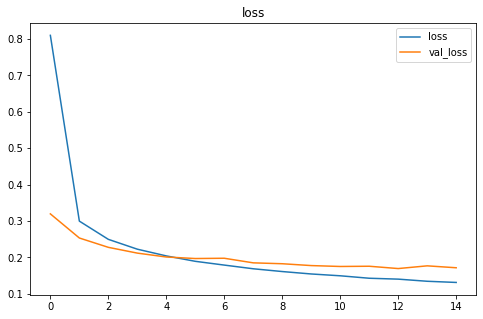

In [8]:
plt.figure(figsize=(8,5))
plt.plot(history.epoch, history.history['loss'])
plt.plot(history.epoch, history.history['val_loss'])
plt.title('loss')
plt.legend(['loss', 'val_loss'])

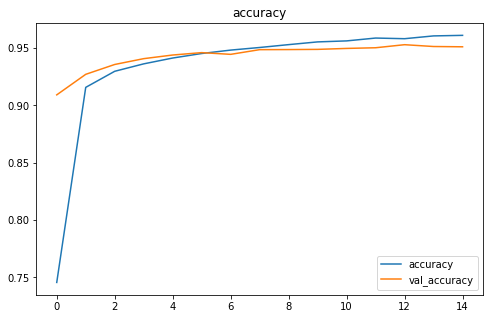

In [9]:
plt.figure(figsize=(8,5))
plt.plot(history.epoch,history.history['accuracy'])
plt.plot(history.epoch,history.history['val_accuracy'])
plt.title('accuracy')
plt.legend(['accuracy', 'val_accuracy'])

In [10]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.1729205846786499
Test accuracy: 0.9501000046730042


In [11]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

predictions = model.predict(x_test)

predictions = np.argmax(predictions, axis=1)
y_test = np.argmax(y_test, axis=1)

print('Confusion Matriks:')
print(confusion_matrix(y_test, predictions))
print()

print('Rlassification Report:')
print(classification_report(y_test, predictions, digits=4))

Confusion Matriks:
[[ 953    0    3    2    2    9    5    1    1    4]
 [   0 1125    5    1    0    1    1    0    2    0]
 [   5    1  996    5    8    2    4    6    4    1]
 [   0    2   17  967    0    8    2    7    5    2]
 [   0    3    9    1  939    1    5    4    2   18]
 [   7    2    4   30    5  818    8    2   11    5]
 [  10    3    3    2    8   20  905    2    5    0]
 [   0    7   15    9    4    1    0  976    1   15]
 [   5    3   11   25   10   10    4    9  894    3]
 [   7    6    1   17   33    5    0   10    2  928]]

Rlassification Report:
              precision    recall  f1-score   support

           0     0.9656    0.9724    0.9690       980
           1     0.9766    0.9912    0.9838      1135
           2     0.9361    0.9651    0.9504      1032
           3     0.9131    0.9574    0.9348      1010
           4     0.9306    0.9562    0.9432       982
           5     0.9349    0.9170    0.9259       892
           6     0.9690    0.9447    0.9567    

### Inference

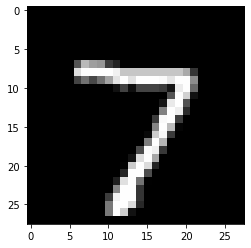

In [12]:
plt.figure(figsize=(4, 4))
plt.imshow(x_test[0], cmap=plt.get_cmap('gray'))
plt.show()

In [13]:
img = x_test[0].reshape(-1, 28, 28, 1)

predict_x = model.predict(img) 
classes_x = np.argmax(predict_x,axis=1)
print(classes_x)

[7]


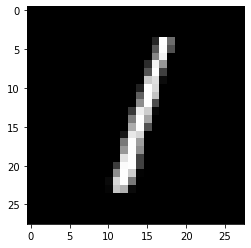

In [14]:
plt.figure(figsize=(4, 4))
plt.imshow(x_test[2], cmap=plt.get_cmap('gray'))
plt.show()

In [15]:
img = x_test[2].reshape(-1, 28, 28, 1)

predict_x = model.predict(img) 
classes_x = np.argmax(predict_x,axis=1)
print(classes_x)

[1]
